<a href="https://colab.research.google.com/github/chenmingguo/chenmingguo.github.io/blob/master/Untitled1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!rm -rf sample_data
!git clone https://github.com/pbaylies/stylegan-encoder

Cloning into 'stylegan-encoder'...
remote: Enumerating objects: 453, done.
remote: Total 453 (delta 0), reused 0 (delta 0), pack-reused 453
Receiving objects: 100% (453/453), 12.61 MiB | 6.34 MiB/s, done.
Resolving deltas: 100% (257/257), done.


In [0]:
cd stylegan-encoder

/content/stylegan-encoder


In [0]:
ls

align_images.py                        Play_with_latent_directions.ipynb
config.py*                             pretrained_example.py*
dataset_tool.py*                       README.md*
dnnlib/                                requirements.txt
encode_images.py                       run_metrics.py*
encoder/                               StyleGAN_Encoder_Tutorial.ipynb
ffhq_dataset/                          swa.py
generate_figures.py*                   teaser.png
Learn_direction_in_latent_space.ipynb  train_effnet.py
LICENSE.txt*                           training/
metrics/                               train.py*
mona_example.jpg                       train_resnet.py


In [0]:
rm -rf aligned_images raw_images

In [0]:
mkdir aligned_images raw_images

In [0]:
from IPython.display import HTML, Audio
from google.colab.output import eval_js
from base64 import b64decode
import numpy as np
import io
from PIL import Image
from datetime import datetime

VIDEO_HTML = """
<video autoplay
 width=%d height=%d style='cursor: pointer;'></video>
<script>

var video = document.querySelector('video')

navigator.mediaDevices.getUserMedia({ video: true })
  .then(stream=> video.srcObject = stream)
  
var data = new Promise(resolve=>{
  video.onclick = ()=>{
    var canvas = document.createElement('canvas')
    var [w,h] = [video.offsetWidth, video.offsetHeight]
    canvas.width = w
    canvas.height = h
    canvas.getContext('2d')
          .drawImage(video, 0, 0, w, h)
    video.srcObject.getVideoTracks()[0].stop()
    video.replaceWith(canvas)
    resolve(canvas.toDataURL('image/jpeg', %f))
  }
})
</script>
"""

def take_photo(quality=1.0, size=(800,600)):
  display(HTML(VIDEO_HTML % (size[0],size[1],quality)))
  data = eval_js("data")
  binary = b64decode(data.split(',')[1])
  f = io.BytesIO(binary)
  img = np.asarray(Image.open(f))
  
  timestampStr = datetime.now().strftime("%d-%b-%Y (%H:%M:%S.%f)")
  filename = 'raw_images/photo_%s.jpeg' %timestampStr
  Image.fromarray(img).save(filename)
  print('Image captured and saved to %s' %filename)

In [0]:
img = take_photo() # click the image to capture a frame!

Found 2 images in raw_images
['image_A.jpg', 'image_B.jpeg']


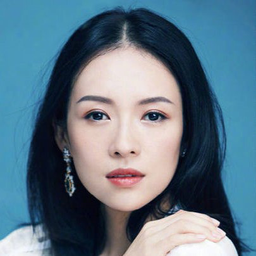

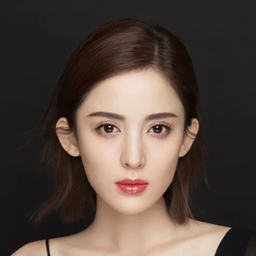

In [0]:
from PIL import Image
import os
imgs = sorted(os.listdir('raw_images'))

print("Found %d images in %s" %(len(imgs), 'raw_images'))
if len(imgs) == 0:
  print("Upload images to the \"raw_images\" folder!")
else:
  print(imgs)

for img_path in imgs:
  img = Image.open('raw_images/' + img_path)
  
  w,h = img.size
  rescale_ratio = 256 / min(w,h)
  img = img.resize((int(rescale_ratio*w),int(rescale_ratio*h)), Image.LANCZOS)
  display(img)

In [0]:
%tensorflow_version 1.x
import tensorflow as tf
print(tf.__version__)

1.15.0


In [0]:
!python align_images.py raw_images/ aligned_images/ --output_size=1048

Using TensorFlow backend.
64045056/64040097 [==============================] - 5s 0us/step
Aligning image_B.jpeg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/image_B_01.png
Aligning image_A.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/image_A_01.png


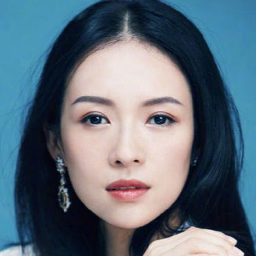

'img 0: image_A_01.png'

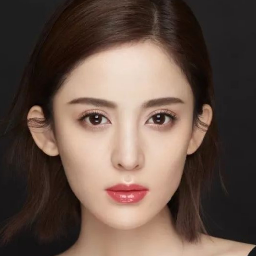

'img 1: image_B_01.png'

In [0]:
def display_folder_content(folder, res = 256):
  if folder[-1] != '/': folder += '/'
  for i, img_path in enumerate(sorted(os.listdir(folder))):
    if '.png' in img_path:
      display(Image.open(folder+img_path).resize((res,res)), 'img %d: %s' %(i, img_path))
      print('\n')
      
display_folder_content('aligned_images')

In [0]:
!gdown https://drive.google.com/uc?id=1aT59NFy9-bNyXjDuZOTMl0qX0jmZc6Zb
!mkdir data
!mv finetuned_resnet.h5 data
!rm -rf generated_images latent_representations

Downloading...
From: https://drive.google.com/uc?id=1aT59NFy9-bNyXjDuZOTMl0qX0jmZc6Zb
To: /content/stylegan-encoder/finetuned_resnet.h5
330MB [00:02, 114MB/s]


In [0]:
print("aligned_images contains %d images ready for encoding!" %len(os.listdir('aligned_images/')))

aligned_images contains 2 images ready for encoding!


In [0]:
!python encode_images.py --batch_size=2 --output_video=True --load_resnet='data/finetuned_resnet.h5' --lr=0.01 --decay_rate=0.8 --iterations=200 --use_l1_penalty=0.3 aligned_images/ generated_images/ latent_representations/
print("\n************ Latent code optimization finished! ***************")




Using TensorFlow backend.










Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where





58892288/58889256 [==============================] - 5s 0us/step


  0% 0/1 [00:00<?, ?it/s]Loading ResNet Model:






  0% 0/200 [00:00<?, ?it/s]WARNING:tensorflow:From /content/stylegan-encoder/encoder/perceptual_model.py:238: The name tf.train.AdamOptimizer is deprecated. Please use tf.compat.v1.train.AdamOptimizer instead.

Instructions for updating:
This op will be removed after the deprecation date. Please switch to tf.sets.difference().

image_A_01 image_B_01: loss 214.8940; lr 0.0100:   0% 0/200 [00:13<?, ?it/s]
image_A_01 image_B_01: loss 214.8940; lr 0.0100:   0% 1/200 [00:14<49:32, 14.94s/it]
image_A_01 image_B_01: loss 187.5310; lr 0.0100:   0% 1/200 [00:16<49:32, 14.94s/it]
image_A_01 image_B_01: loss 187.5310; lr 0.0100:   1% 2/200 [00:16<35:53, 10.88s/it]
image_A_01 image_B_01: loss 176.4209; lr 0.0100:   1% 2/200 [00:17<35:53, 10.88s

In [0]:
import dnnlib, pickle
import dnnlib.tflib as tflib
tflib.init_tf()
synthesis_kwargs = dict(output_transform=dict(func=tflib.convert_images_to_uint8, nchw_to_nhwc=True), minibatch_size=1)

model_dir = 'cache/'
model_path = [model_dir+f for f in os.listdir(model_dir) if 'stylegan-ffhq' in f][0]
print("Loading StyleGAN model from %s..." %model_path)

with dnnlib.util.open_url(model_path) as f:
  generator_network, discriminator_network, averaged_generator_network = pickle.load(f)
  
print("StyleGAN loaded & ready for sampling!")







Loading StyleGAN model from cache/263e666dc20e26dcbfa514733c1d1f81_karras2019stylegan-ffhq-1024x1024.pkl...







Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
StyleGAN loaded & ready for sampling!


In [0]:
def generate_images(generator, latent_vector, z = True):
    batch_size = latent_vector.shape[0]
    
    if z: #Start from z: run the full generator network
        return generator.run(latent_vector.reshape((batch_size, 512)), None, randomize_noise=False, **synthesis_kwargs)
    else: #Start from w: skip the mapping network
        return generator.components.synthesis.run(latent_vector.reshape((batch_size, 18, 512)), randomize_noise=False, **synthesis_kwargs)

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

def plot_imgs(model, rows, columns):
  for i in range(rows):
    f, axarr = plt.subplots(1,columns, figsize = (20,8))
    for j in range(columns):
      img = generate_images(model, np.random.randn(1,512), z = True)[0]
      axarr[j].imshow(img)
      axarr[j].axis('off')
      axarr[j].set_title('Resolution: %s' %str(img.shape))
    plt.show()

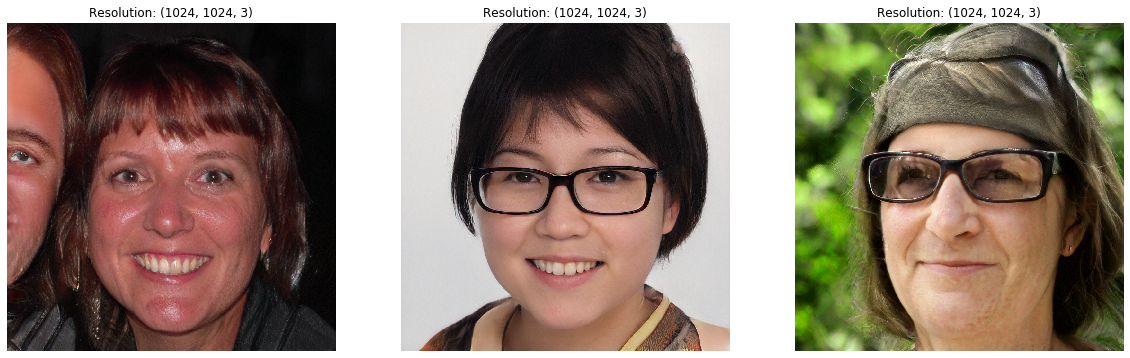

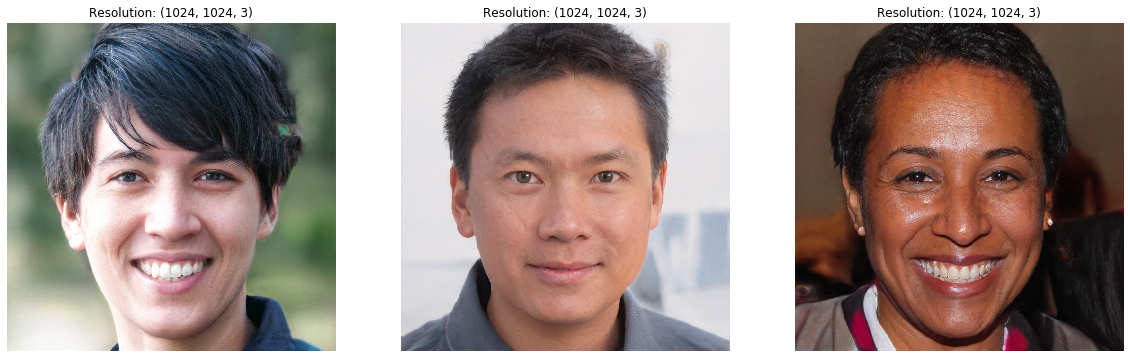

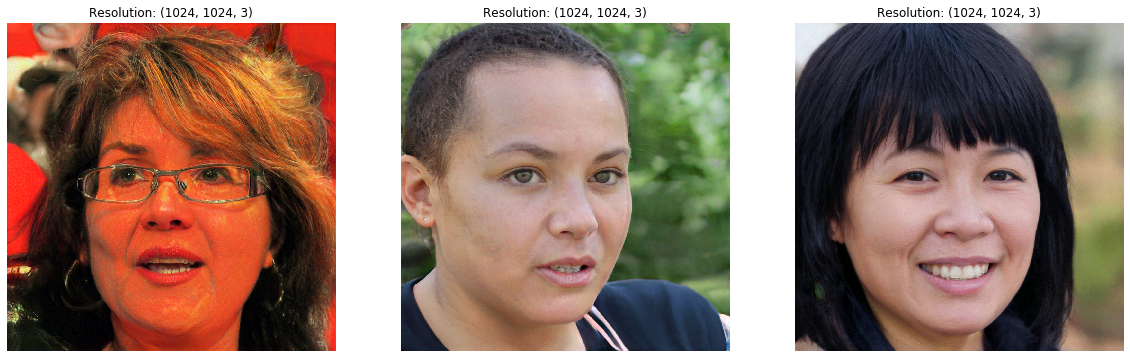

In [0]:
plot_imgs(averaged_generator_network, 3, 3)

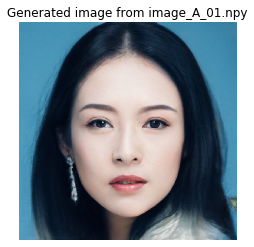

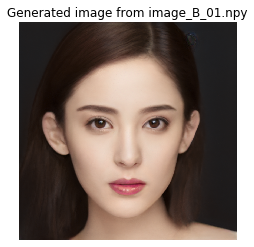

In [0]:
import numpy as np

for f in sorted(os.listdir('latent_representations')):
  w = np.load('latent_representations/' + f).reshape((1,18,-1))
  img = generate_images(averaged_generator_network, w, z = False)[0]
  plt.imshow(img)
  plt.axis('off')
  plt.title("Generated image from %s" %f)
  plt.show()

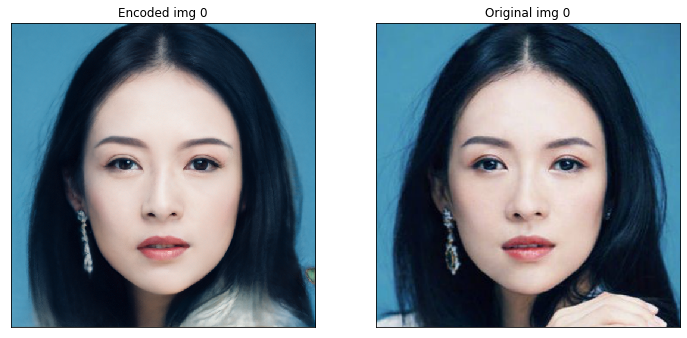

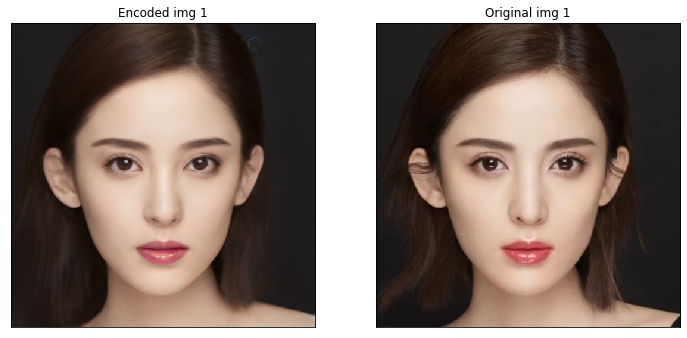

In [0]:
import matplotlib.pyplot as plt

def plot_two_images(img1,img2, img_id, fs = 12):
  f, axarr = plt.subplots(1,2, figsize=(fs,fs))
  axarr[0].imshow(img1)
  axarr[0].title.set_text('Encoded img %d' %img_id)
  axarr[1].imshow(img2)
  axarr[1].title.set_text('Original img %d' %img_id)
  plt.setp(plt.gcf().get_axes(), xticks=[], yticks=[])
  plt.show()

def display_sbs(folder1, folder2, res = 256):
  if folder1[-1] != '/': folder1 += '/'
  if folder2[-1] != '/': folder2 += '/'
    
  imgs1 = sorted([f for f in os.listdir(folder1) if '.png' in f])
  imgs2 = sorted([f for f in os.listdir(folder2) if '.png' in f])
  if len(imgs1)!=len(imgs2):
    print("Found different amount of images in aligned vs raw image directories. That's not supposed to happen...")
  
  for i in range(len(imgs1)):
    img1 = Image.open(folder1+imgs1[i]).resize((res,res))
    img2 = Image.open(folder2+imgs2[i]).resize((res,res))
    plot_two_images(img1,img2, i)
    print("")
     
display_sbs('generated_images/', 'aligned_images/', res = 512)

In [0]:
good_images = [0,1]  #Change these numbers to pick out latents that worked well (see the image plots)

In [0]:
import numpy as np
latents = sorted(os.listdir('latent_representations'))

out_file = '/content/output_vectors.npy'
out_file2 = '/content/imageB_vectors.npy'
final_w_vectors = []
for img_id in good_images:
  w = np.load('latent_representations/' + latents[img_id])
  final_w_vectors.append(w)

final_w_vectors = np.array(final_w_vectors)
print(str(final_w_vectors.shape),len(final_w_vectors))
final_w_vectors2 = final_w_vectors[1]
print(str(final_w_vectors2.shape),len(final_w_vectors2))
np.save(out_file, final_w_vectors)
np.save(out_file2, final_w_vectors2)

print("%d latent vectors of shape %s saved to %s!" %(len(good_images), str(w.shape), out_file))
print("%d latent vectors of shape %s saved to %s!" %(len(final_w_vectors2), str(final_w_vectors2.shape), out_file2))

(2, 18, 512) 2
(18, 512) 18
2 latent vectors of shape (18, 512) saved to /content/output_vectors.npy!
18 latent vectors of shape (18, 512) saved to /content/imageB_vectors.npy!


In [0]:
!nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2018 NVIDIA Corporation
Built on Sat_Aug_25_21:08:01_CDT_2018
Cuda compilation tools, release 10.0, V10.0.130


In [0]:
!pip install --upgrade tensorflow-gpu==1.12.2

     |████████████████████████████████| 127.8MB 92kB/s 
     |████████████████████████████████| 3.1MB 27.7MB/s 
ERROR: tensorflow 1.15.0 has requirement tensorboard<1.16.0,>=1.15.0, but you'll have tensorboard 1.12.2 which is incompatible.
  Found existing installation: tensorboard 1.15.0
    Uninstalling tensorboard-1.15.0:
      Successfully uninstalled tensorboard-1.15.0


In [0]:
!wget https://developer.nvidia.com/compute/cuda/9.0/Prod/local_installers/cuda-repo-ubuntu1604-9-0-local_9.0.176-1_amd64-deb
!dpkg -i cuda-repo-ubuntu1604-9-0-local_9.0.176-1_amd64-deb
!apt-key add /var/cuda-repo-9-0-local/7fa2af80.pub
!apt-get update
!apt-get install cuda=9.0.176-1
!echo ****** Cuda reinstall completed. Restart runtime now! *******

--2019-12-12 04:58:20--  https://developer.nvidia.com/compute/cuda/9.0/Prod/local_installers/cuda-repo-ubuntu1604-9-0-local_9.0.176-1_amd64-deb
Resolving developer.nvidia.com (developer.nvidia.com)... 192.229.189.146
Connecting to developer.nvidia.com (developer.nvidia.com)|192.229.189.146|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://developer.download.nvidia.com/compute/cuda/9.0/secure/Prod/local_installers/cuda-repo-ubuntu1604-9-0-local_9.0.176-1_amd64.deb?jy9oilEnBOv3pjgCHFpvVYSF3IzZn3K_nNGG-v5wwMvIBL0n6YTfgq-GO3CqcEDk3GqcvBFYmvi8HXJL-pEHr2dD78GCj73xF3usW3A5Qn3a06MGsHVLyN_c1BqUSGYEjN1Ao1VHNSKloyzfZ_QE_5MiU05MZY-B_d_I03n--Fy0tC5KbXue4QHHUaYjvvcrU_iQ-gpaU0CC2lmP1QJ1 [following]
--2019-12-12 04:58:21--  https://developer.download.nvidia.com/compute/cuda/9.0/secure/Prod/local_installers/cuda-repo-ubuntu1604-9-0-local_9.0.176-1_amd64.deb?jy9oilEnBOv3pjgCHFpvVYSF3IzZn3K_nNGG-v5wwMvIBL0n6YTfgq-GO3CqcEDk3GqcvBFYmvi8HXJL-pEHr2dD78GCj73xF3usW3A5Qn3a06

In [0]:
%tensorflow_version 1.x
import tensorflow as tf
print(tf.__version__)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or 

1.12.2


In [0]:
!nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2017 NVIDIA Corporation
Built on Fri_Sep__1_21:08:03_CDT_2017
Cuda compilation tools, release 9.0, V9.0.176


In [0]:
!git clone https://github.com/tr1pzz/InterFaceGAN.git

Cloning into 'InterFaceGAN'...
remote: Enumerating objects: 127, done.
remote: Counting objects: 100% (127/127), done.
remote: Compressing objects: 100% (109/109), done.
remote: Total 127 (delta 14), reused 124 (delta 14), pack-reused 0
Receiving objects: 100% (127/127), 2.06 MiB | 2.11 MiB/s, done.
Resolving deltas: 100% (14/14), done.


In [0]:
cd /content/InterFaceGAN/

/content/InterFaceGAN


In [0]:
!gdown https://drive.google.com/uc?id=1MEGjdvVpUsu1jB4zrXZN7Y4kBBOzizDQ
!mv /content/InterFaceGAN/karras2019stylegan-ffhq-1024x1024.pkl /content/InterFaceGAN/models/pretrain/karras2019stylegan-ffhq-1024x1024.pkl

Downloading...
From: https://drive.google.com/uc?id=1MEGjdvVpUsu1jB4zrXZN7Y4kBBOzizDQ
To: /content/InterFaceGAN/karras2019stylegan-ffhq-1024x1024.pkl
325MB [00:01, 177MB/s]


In [0]:
import numpy as np
final_w_vectors = np.load('/content/imageB_vectors.npy')

# print("%d latent vectors of shape %s loaded from %s!" %(final_w_vectors2.shape[0], str(final_w_vectors2.shape[1:]), 'imageB_vectors.npy'))

In [0]:
# latent_direction = 'age'     #### Pick one of ['age', 'eyeglasses', 'gender', 'pose', 'smile']
latent_direction = 'smile'     #### Pick one of ['age', 'eyeglasses', 'gender', 'pose', 'smile']

morph_strength = 3           # Controls how strongly we push the face into a certain latent direction (try 1-5)
nr_interpolation_steps = 100  # The amount of intermediate steps/frames to render along the interpolation path

In [0]:
boundary_file = 'stylegan_ffhq_%s_w_boundary.npy' %latent_direction

print("Ready to start manipulating faces in the ** %s ** direction!" %latent_direction)
print("Interpolation from %d to %d with %d intermediate frames." %(-morph_strength, morph_strength, nr_interpolation_steps))
print("\nLoading latent directions from %s" %boundary_file)

Ready to start manipulating faces in the ** pose ** direction!
Interpolation from -3 to 3 with 100 intermediate frames.

Loading latent directions from stylegan_ffhq_pose_w_boundary.npy


In [0]:
import subprocess
return_code = subprocess.call("rm -r results/%s" %latent_direction, shell=True)

run_command = "python edit.py \
      -m stylegan_ffhq \
      -b boundaries/stylegan_ffhq_%s_w_boundary.npy \
      -s Wp \
      -i '/content/imageB_vectors.npy' \
      -o results/%s \
      --start_distance %.2f \
      --end_distance %.2f \
      --steps=%d" %(latent_direction, latent_direction, -morph_strength, morph_strength, nr_interpolation_steps)


print("Running latent interpolations... This should not take longer than ~1 minute")
print("Running: %s" %run_command)
return_code = subprocess.call(run_command, shell=True)

if not return_code:
  print("Latent interpolation successfully dumped to disk!")
else:
  print("Something went wrong, try re-executing this cell...")

Running latent interpolations... This should not take longer than ~1 minute
Running: python edit.py       -m stylegan_ffhq       -b boundaries/stylegan_ffhq_pose_w_boundary.npy       -s Wp       -i '/content/imageB_vectors.npy'       -o results/pose       --start_distance -3.00       --end_distance 3.00       --steps=100
Latent interpolation successfully dumped to disk!


In [0]:
image_folder = '/content/InterFaceGAN/results/%s' %latent_direction
video_fps = 12.

In [0]:
from moviepy.editor import *
import cv2

out_path = '/content/output_videos/'

images = [img_path for img_path in sorted(os.listdir(image_folder)) if '.jpg' in img_path]
os.makedirs(out_path, exist_ok=True)

prev_id = None
img_sets = []
for img_path in images:
  img_id = img_path.split('_')[0]
  if img_id == prev_id: #append
    img_sets[-1].append(img_path)
    
  else: #start a new img set
    img_sets.append([])
    img_sets[-1].append(img_path)
  prev_id = img_id

print("Found %d image sets!\n" %len(img_sets))
if image_folder[-1] != '/':
  image_folder += '/'

def make_video(images, vid_name):
    fourcc = cv2.VideoWriter_fourcc(*'mp4v')
    video = cv2.VideoWriter(vid_name, fourcc, video_fps, (1024, 1024))
    gen = {}
    for img in images:
      video.write(img)
    video.release()
    print('finished '+ vid_name)
    
    
for i in range(len(img_sets)):
  print("############################")
  print("\nGenerating video %d..." %i)
  set_images = []
  vid_name = out_path + 'out_video_%s_%02d.mp4' %(latent_direction,i)
  for img_path in img_sets[i]:
    set_images.append(cv2.imread(image_folder + img_path))

  set_images.extend(reversed(set_images))
  make_video(set_images, vid_name)

Imageio: 'ffmpeg-linux64-v3.3.1' was not found on your computer; downloading it now.
Try 1. Download from https://github.com/imageio/imageio-binaries/raw/master/ffmpeg/ffmpeg-linux64-v3.3.1 (43.8 MB)
Downloading: 8192/45929032 bytes (0.0%)1810432/45929032 bytes (3.9%)5685248/45929032 bytes (12.4%)9420800/45929032 bytes (20.5%)13369344/45929032 bytes (29.1%)17252352/45929032 bytes (37.6%)21127168/45929032 bytes (46.0%)25010176/45929032 bytes (54.5%)28860416/45929032 bytes (62.8%)32727040/45929032 bytes (71.3%)36560896/45929032 bytes (79.6%)40468480/45929032 bytes (88.1%)44376064/45929032 bytes (96.6%)

In [0]:
ls

boundaries/  generate_data.py  models/    results/    train_boundary.py
edit.py      LICENSE           README.md  teaser.jpg  utils/
